In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing data to pandas dataframe. Display
data = pd.read_csv("breast-cancer-wisconsin.csv")

In [3]:
# Basic Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                  699 non-null int64
clumpthickness      699 non-null int64
uniformcellsize     699 non-null int64
uniformcellshape    699 non-null int64
margadhesion        699 non-null int64
epithelial          699 non-null int64
barenuclei          699 non-null object
blandchromatin      699 non-null int64
normalnucleoli      699 non-null int64
mitoses             699 non-null int64
benormal            699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
# drop duplicates
data.drop_duplicates(subset = "id", inplace = True)

In [5]:
# This replaces ? as np.NaN, and converts the str to int64
data['barenuclei'] = pd.to_numeric(data['barenuclei'], errors='coerce')
len(data[data.isnull().any(axis=1)].index) # Checking that ?'s were nullified

16

In [6]:
data = data.dropna() # Remove NaN values

In [7]:
# Map's benormal column's values from 2 -> 0, and 4 -> 1
data['benormal'] = data['benormal'].map({4.0:1.0, 2.0:0})

In [8]:
# id column unnecessary
data.drop(columns = "id", inplace = True)
# basic info with cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 697
Data columns (total 10 columns):
clumpthickness      629 non-null int64
uniformcellsize     629 non-null int64
uniformcellshape    629 non-null int64
margadhesion        629 non-null int64
epithelial          629 non-null int64
barenuclei          629 non-null float64
blandchromatin      629 non-null int64
normalnucleoli      629 non-null int64
mitoses             629 non-null int64
benormal            629 non-null float64
dtypes: float64(2), int64(8)
memory usage: 54.1 KB


In [9]:
# basic statistics with cleaned data
data.describe()

,clumpthickness,uniformcellsize,uniformcellshape,margadhesion,epithelial,barenuclei,blandchromatin,normalnucleoli,mitoses,benormal
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,4.499205,3.201908,3.279809,2.920509,3.297297,3.624801,3.507154,2.960254,1.629571,0.365660
std,2.864023,3.073763,3.003913,2.928562,2.257121,3.670647,2.471886,3.121225,1.763343,0.481998
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


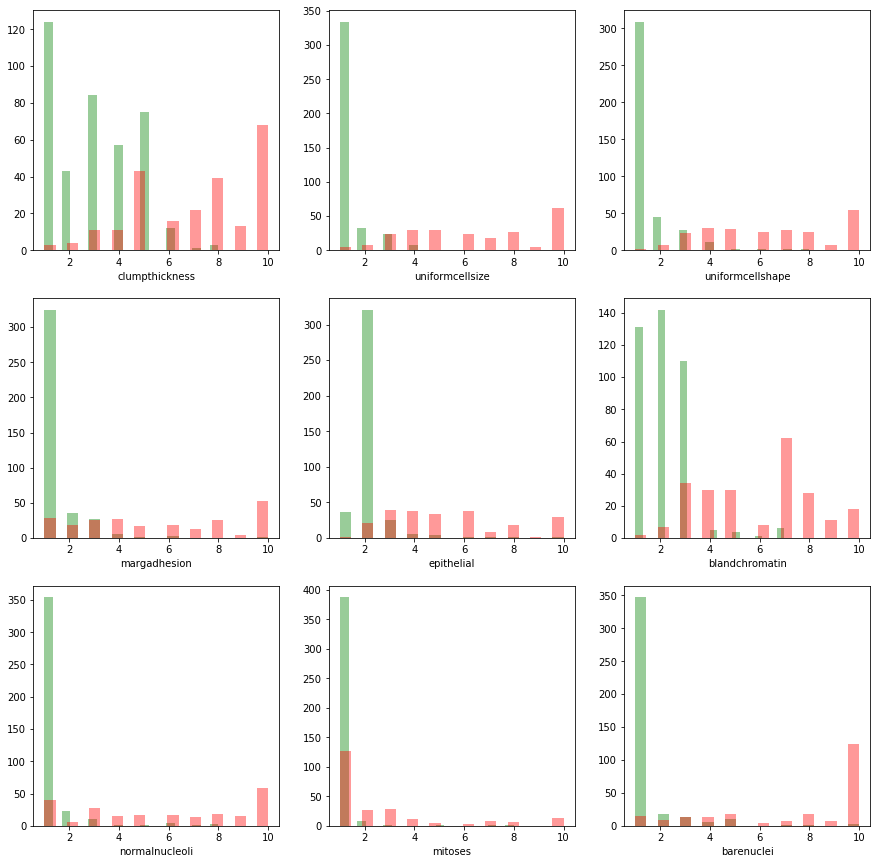

In [12]:
#Histograms with color

fig, ax = plt.subplots(3,3, figsize=(15,15))
sns.distplot(data[data["benormal"]==0].clumpthickness, hist = True, kde = False, bins = 20, ax=ax[0,0], color = 'g')
sns.distplot(data[data["benormal"]==1].clumpthickness, hist = True, kde = False, bins = 20, ax=ax[0,0], color = 'r')

sns.distplot(data[data["benormal"]==0].uniformcellsize, hist = True, kde = False, bins = 20, ax=ax[0,1], color = 'g')
sns.distplot(data[data["benormal"]==1].uniformcellsize, hist = True, kde = False, bins = 20, ax=ax[0,1], color = 'r')

sns.distplot(data[data["benormal"]==0].uniformcellshape, hist = True, kde = False, bins = 20, ax=ax[0,2], color = 'g')
sns.distplot(data[data["benormal"]==1].uniformcellshape, hist = True, kde = False, bins = 20, ax=ax[0,2], color = 'r')

sns.distplot(data[data["benormal"]==0].margadhesion, hist = True, kde = False, bins = 20, ax=ax[1,0], color = 'g')
sns.distplot(data[data["benormal"]==1].margadhesion, hist = True, kde = False, bins = 20, ax=ax[1,0], color = 'r')

sns.distplot(data[data["benormal"]==0].epithelial, hist = True, kde = False, bins = 20, ax=ax[1,1], color = 'g')
sns.distplot(data[data["benormal"]==1].epithelial, hist = True, kde = False, bins = 20, ax=ax[1,1], color = 'r')

sns.distplot(data[data["benormal"]==0].blandchromatin, hist = True, kde = False, bins = 20, ax=ax[1,2], color = 'g')
sns.distplot(data[data["benormal"]==1].blandchromatin, hist = True, kde = False, bins = 20, ax=ax[1,2], color = 'r')

sns.distplot(data[data["benormal"]==0].normalnucleoli, hist = True, kde = False, bins = 20, ax=ax[2,0], color = 'g')
sns.distplot(data[data["benormal"]==1].normalnucleoli, hist = True, kde = False, bins = 20, ax=ax[2,0], color = 'r')

sns.distplot(data[data["benormal"]==0].mitoses, hist = True, kde = False, bins = 20, ax=ax[2,1], color = 'g')
sns.distplot(data[data["benormal"]==1].mitoses, hist = True, kde = False, bins = 20, ax=ax[2,1], color = 'r')

sns.distplot(data[data["benormal"]==0].barenuclei, hist = True, kde = False, bins = 20, ax=ax[2,2], color = 'g')
sns.distplot(data[data["benormal"]==1].barenuclei, hist = True, kde = False, bins = 20, ax=ax[2,2], color = 'r')

plt.show()



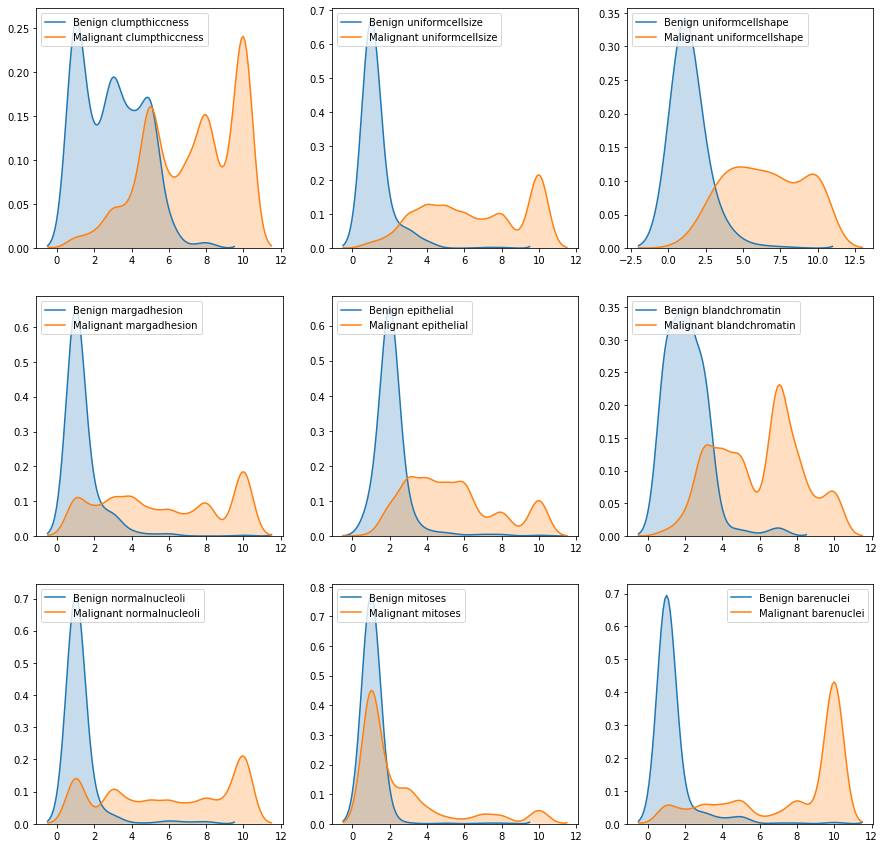

In [11]:
# Density Plots
fig, ax = plt.subplots(3,3, figsize=(15,15))

sns.kdeplot(data[data["benormal"] == 0].clumpthickness, label="Benign clumpthiccness", bw = .5, shade = True, ax = ax[0,0])
sns.kdeplot(data[data["benormal"] == 1].clumpthickness, label="Malignant clumpthiccness", bw = .5, shade = True, ax = ax[0,0])

sns.kdeplot(data[data["benormal"] == 0].uniformcellsize, label="Benign uniformcellsize", bw = .5, shade = True, ax = ax[0,1])
sns.kdeplot(data[data["benormal"] == 1].uniformcellsize, label="Malignant uniformcellsize", bw = .5, shade = True, ax = ax[0,1])

sns.kdeplot(data[data["benormal"] == 0].uniformcellshape, label="Benign uniformcellshape", bw = 1, shade = True, ax = ax[0,2])
sns.kdeplot(data[data["benormal"] == 1].uniformcellshape, label="Malignant uniformcellshape", bw = 1, shade = True, ax = ax[0,2])

sns.kdeplot(data[data["benormal"] == 0].margadhesion, label="Benign margadhesion", bw = .5, shade = True, ax = ax[1,0])
sns.kdeplot(data[data["benormal"] == 1].margadhesion, label="Malignant margadhesion", bw = .5, shade = True, ax = ax[1,0])

sns.kdeplot(data[data["benormal"] == 0].epithelial, label="Benign epithelial", bw = .5, shade = True, ax = ax[1,1])
sns.kdeplot(data[data["benormal"] == 1].epithelial, label="Malignant epithelial", bw = .5, shade = True, ax = ax[1,1])

sns.kdeplot(data[data["benormal"] == 0].blandchromatin, label="Benign blandchromatin", bw = .5, shade = True, ax = ax[1,2])
sns.kdeplot(data[data["benormal"] == 1].blandchromatin, label="Malignant blandchromatin", bw = .5, shade = True, ax = ax[1,2])

sns.kdeplot(data[data["benormal"] == 0].normalnucleoli, label="Benign normalnucleoli", bw = .5, shade = True, ax = ax[2,0])
sns.kdeplot(data[data["benormal"] == 1].normalnucleoli, label="Malignant normalnucleoli", bw = .5, shade = True, ax = ax[2,0])

sns.kdeplot(data[data["benormal"] == 0].mitoses, label="Benign mitoses", bw = .5, shade = True, ax = ax[2,1])
sns.kdeplot(data[data["benormal"] == 1].mitoses, label="Malignant mitoses", bw = .5, shade = True, ax = ax[2,1])

sns.kdeplot(data[data["benormal"] == 0].barenuclei, label="Benign barenuclei", bw = .5, shade = True, ax = ax[2,2])
sns.kdeplot(data[data["benormal"] == 1].barenuclei, label="Malignant barenuclei", bw = .5, shade = True, ax = ax[2,2])

for i in range(0,9):
    fig.get_axes()[i].legend(loc='upper left')


plt.legend();

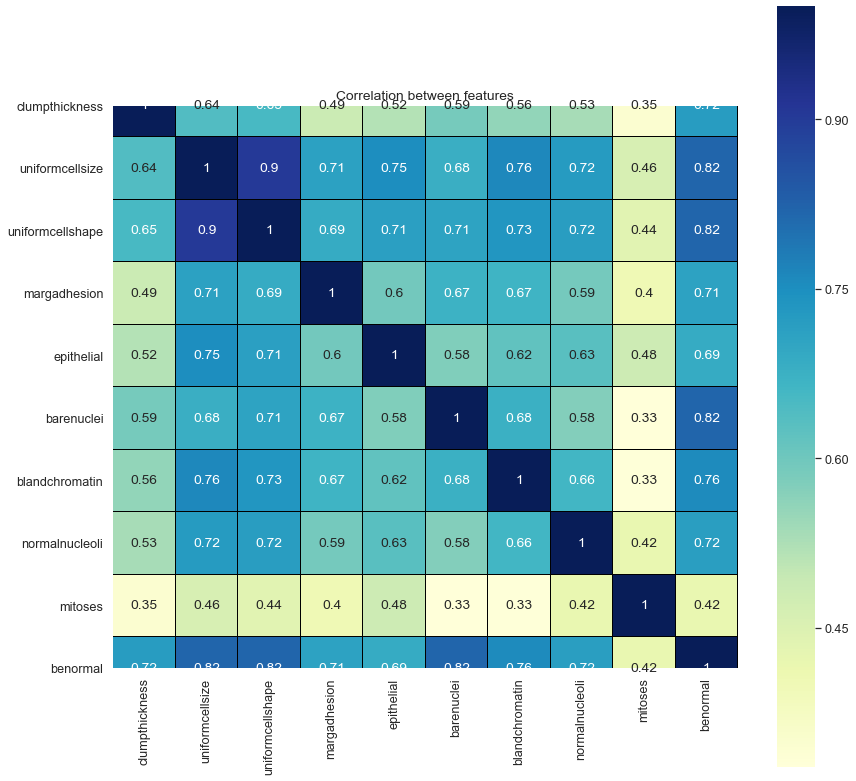

In [13]:
# seaborn heat map
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 14))

sns.heatmap(corr, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

BEGIN MACHINE LEARNING

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
# Splitting features and labels, getting random seed to use for everything for consistency
X = np.array(data.drop(columns = 'benormal', inplace = False))
Y = data['benormal']
rState = 42


In [16]:
# Train/Validation/Test split of 70, 15, 15
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .30, random_state = rState)
xTest, xVal, yTest, yVal = train_test_split(xTest, yTest, test_size = .5, random_state = rState)


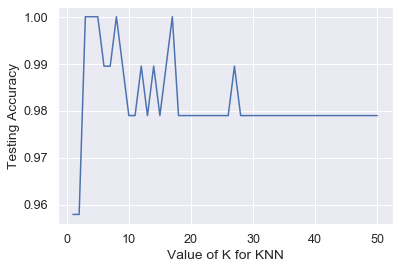

0.9789473684210527
1.0


In [17]:
preds = []
score = []
for n in range(1,51):
    KNN_val = KNeighborsClassifier(n_neighbors = n)
    KNN_val.fit(xTrain, yTrain)
    preds = KNN_val.predict(xVal)
    score.append(accuracy_score(y_true = yVal, y_pred = preds))
    
plt.plot(range(1,51), score)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

plt.show()
print(np.median(score))
print(np.max(score))


In [18]:
score[7]

1.0

Using n = 6, Testing with test set.

In [19]:
X = np.array(data.drop(columns = {'benormal'}, inplace = False))
Y = data['benormal']

# Train/Validation/Test split of roughly 70, 15, 15
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .30, random_state = rState)
xTest, xVal, yTest, yVal = train_test_split(xTest, yTest, test_size = .5, random_state = rState)

KNN_val = KNeighborsClassifier(n_neighbors = 6)
KNN_val.fit(xTrain, yTrain)
preds = KNN_val.predict(xTest)
accuracy_score(y_true = yTest, y_pred = preds)

0.9680851063829787

Achieved Accuracy of 96.8%|

Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
X = data.drop(columns = 'benormal', inplace = False)
Y = data['benormal']

# Train-Test split of 70-30
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = rState)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
accuracy_score(y_true = Y_test, y_pred = clf.predict(X_test))


0.9365079365079365

Achieved accuracy of 93.65%